### DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION 


### Prediction using Supervised ML


### Author:Muskaan Nohria 

### Objective: Predict the percentage of an student based on the no. of study hours


### Importing all libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Importing data

In [50]:
URL="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(URL)
print ("Data has been imported")
data.head(10)

Data has been imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Making a scatter plot

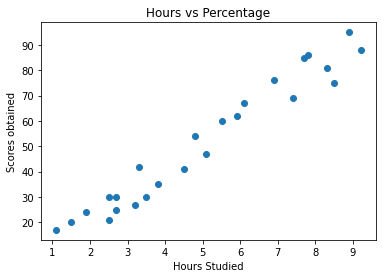

In [23]:
x=data["Hours"]
y=data["Scores"]
plt.scatter(x,y)
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.title("Hours vs Percentage")
plt.show()

# Method 1: Using Scipy

### Making a function for linear regression 

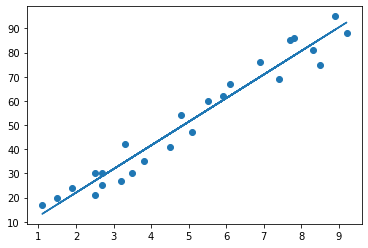

In [24]:
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

### Predict values

In [25]:
#Our model will predict the score for the any given hours
score = myfunc(9.25)
print("Score is: ", score)

Score is:  92.90985477015731


### Evaluating the model

In [26]:
print("Standard error: ",std_err)

Standard error:  0.45294141201804755


# Method 2: Using Scikit Learn

In [27]:
# X contains all the hours and Y contains the Scores
X = data.iloc[:, 0:1].values  
Y = data.iloc[:, 1].values 
print (X)
print (Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Splitting the data into test trail data using sklearn

In [28]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0) 
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


### Fitting into linear regression and training the data

In [29]:
from sklearn.linear_model import LinearRegression 
Z=LinearRegression()
Z.fit(X_train,Y_train)
print ("Training Complete")

Training Complete


### Plotting linear regression graph

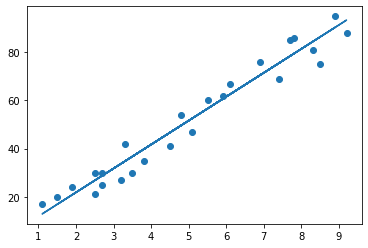

In [30]:
line=Z.coef_*X+Z.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

### Comparing actual vs predicted values

In [31]:
Y_pred=Z.predict(X_test)
df=pd.DataFrame({'real values':Y_test,'Predicted Value':Y_pred})
df

,real values,Predicted Value
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Predicting Score

In [53]:
# You can also test with your own data
hours = (9.25)
print("No of Hours = ",hours)
own = Z.predict([[hours],])
print("Predicted Score = ",own[0])

No of Hours =  9.25
Predicted Score =  93.89272889341652


### Evaluating the model

In [37]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.130879918502482
